In [1]:
import cfe

cfe.logger.setLevel("DEBUG")
cfe.settings.backend = "cfe_docker"

[2024年12月24日 10时59分57秒] INFO                                                                                 
                                          _____     _ _ ______    _       ______            _                      
                                         / ____|   | | |  ____|  | |     |  ____|          | |                     
                                        | |     ___| | | |__ __ _| |_ ___| |__  __  ___ __ | | ___  _ __ ___ _ __  
                                        | |    / _ \ | |  __/ _` | __/ _ \  __| \ \/ / '_ \| |/ _ \| '__/ _ \ '__| 
                                        | |___|  __/ | | | | (_| | ||  __/ |____ >  <| |_) | | (_) | | |  __/ |    
                                         \_____\___|_|_|_|  \__,_|\__\___|______/_/\_\ .__/|_|\___/|_|  \___|_|    
                                                                                     | |                           
                                                                              

Data

In [2]:
import pandas as pd
import scanpy as sc

# 从Anndata创建
adata = sc.read_h5ad(f"../tests/data/bifurcating.h5ad")
fadata = cfe.data.FateAnnData.from_anndata(adata)
fadata.layers["counts"] = fadata.X.copy()
fadata.layers["expression"] = fadata.X.copy()

cluster_key = "lineage"
fadata.obs.index = fadata.obs["cell_id"] 

fadata

                        DEBUG    Create a FateAnnData object from an existing AnnData object.                      


AnnData object with n_obs × n_vars = 1000 × 250
    obs: 'cell_id', 'from', 'to', 'time', 'lineage', 'global_time', 'lin_time_sC -> sEndC', 'lin_time_sA -> sB', 'lin_time_sB -> sBmid', 'lin_time_sBmid -> sC', 'lin_time_sD -> sEndD', 'lin_time_sBmid -> sD'
    uns: 'endpoints', 'gt_velocities', 'lineage_colors', 'startpoints', 'cfe'
    obsm: 'X_emb', 'X_umap'
    layers: 'spliced', 'unspliced', 'counts', 'expression'

Method

In [3]:
method = cfe.method.FateMethod(method_name="paga")

                        DEBUG    CFEDockerBackend __init__                                                         
                        DEBUG    Docker image(huangzhaoyang/cf_paga:0.0.1) loaded                                  
[2024年12月24日 10时59分58秒] INFO     method_backend: <cfe.method.fate_cfe_docker_backend.CFEDockerBackend object 
                                       at 0x76e7eb60e4d0>                                                          


In [4]:
# PAGA need more prior information and parameters
prior_information = {
    "start_id": "cell1",
    "groups_id": fadata.obs[cluster_key].tolist()
}
parameters = {"filter_features": False}
fadata.add_prior_information(**prior_information)  # add prior information to fadata
method.infer_trajectory(fadata, parameters=parameters)  # add parameters when inferring trajectory

                        DEBUG    Temp wd: /tmp/tmpjwf2xoth                                                         
[2024年12月24日 11时00分07秒] DEBUG    Docker Finish                                                               
                        DEBUG    /usr/local/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705:        
                                 in a future version. Please use `log1p` from `scanpy.pp` instead.                 
                                 log1p(adata)                                                                      
                                 /code/run.py:43: DeprecationWarning: DataFrameGroupBy.apply operated on the       
                                 grouping columns. This behavior is deprecated, and in a future version of pandas  
                                 the grouping columns will be excluded from the operation. Either pass             
                                 `include_groups=False` to exclude the groupin

Plot

                        DEBUG    plot_trajectory                                                                   
[2024年12月24日 11时00分08秒] DEBUG    add waypoints                                                               
                        DEBUG    FateAnnData add_waypoints                                                         
[2024年12月24日 11时00分21秒] DEBUG    add waypoints shape is (208, 1000), finished!                               


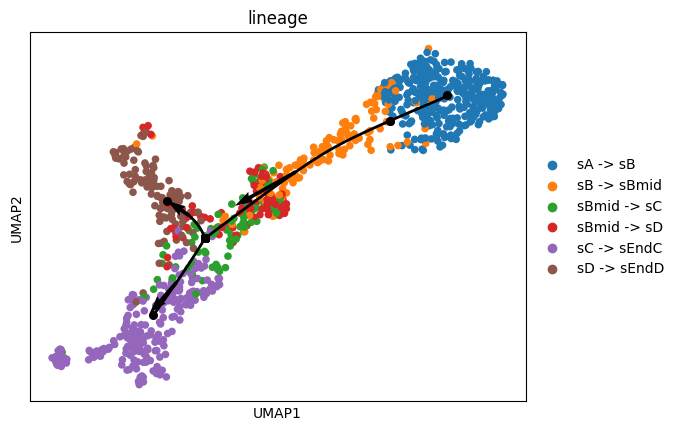

In [5]:
cfe.plot.plot_trajectory(fadata, basis="umap", color="lineage")